In [ ]:
%pip install pysus

In [6]:
import pandas as pd
import numpy as np
from pysus.ftp.databases.sim import SIM
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

Data dictionnaire:

- `DTOBITO`: Death date, format - ddmmaaaa;

- `SEXO`: Sex- 0: Ignored / 1: Male / 2: Female;

- `RACACOR`: Race/color - 1: White / 2: Black / 3: Asian/Yellow / 4: Brown / 5: Indigenous;

- `ESTCIV`: Marital state - 1: Single / 2: Married / 3: Widowed / 4: Divorced / 5: Civil union / 9: Ignored;

- `ESC`: Schooling, as completed years - 1: None / 2: 1 to 3 years / 3: 4 to 7 years / 4: 8 to 11 years / 5: 12 or more / 9: Ignored;

- `CODMUNOCOR`: IBGE code of the city the death occurred;

- `LOCOCOR`: Place of death - 9: Ignored / 1: Hospital / 2: other health stablishment / 3: House / 4: Public road / 5: Other;

- `CAUSABAS`: Cause of death, according to ICD-10;

- `UF`: Code of the State.

## Download

We first need to load the files from the ftp databases from DATASUS.
CIRCOBITO: is the feature that indicate the type of death -
9: Ignored; 1: Accident; 2: Suicide; 3: Homicide; 4: Others;

We downloaded data from all types of deaths from all states.

In [ ]:
sim = SIM().load()

In [ ]:
north = [
    'AC',  # Acre
    'AP',  # Amapá
    'AM',  # Amazonas
    'PA',  # Pará
    'RO',  # Rondônia
    'RR',  # Roraima
    'TO'   # Tocantins
]
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [ ]:
df = pd.DataFrame()
for state in north:
    for year in years:
        try:
            df1 = sim.download(sim.get_files('CID10', state, year)).to_dataframe()
            df1['UF'] = state
            df = pd.concat([df, df1], ignore_index= True)
        except Exception as e:
            continue

100%|████████████████████████████████████████| 186k/186k [00:00<00:00, 20.6MB/s]
100%|█████████████████████████████████████████| 200k/200k [00:00<00:00, 219MB/s]
100%|█████████████████████████████████████████| 197k/197k [00:00<00:00, 221MB/s]
100%|█████████████████████████████████████████| 253k/253k [00:00<00:00, 317MB/s]
100%|█████████████████████████████████████████| 238k/238k [00:00<00:00, 306MB/s]
100%|█████████████████████████████████████████| 349k/349k [00:00<00:00, 376MB/s]
100%|█████████████████████████████████████████| 331k/331k [00:00<00:00, 295MB/s]
100%|████████████████████████████████████████| 367k/367k [00:00<00:00, 36.1MB/s]
100%|████████████████████████████████████████| 371k/371k [00:00<00:00, 36.1MB/s]
100%|████████████████████████████████████████| 330k/330k [00:00<00:00, 32.6MB/s]
100%|████████████████████████████████████████| 322k/322k [00:00<00:00, 30.9MB/s]
100%|████████████████████████████████████████| 368k/368k [00:00<00:00, 36.0MB/s]
100%|███████████████████████

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151033 entries, 0 to 1151032
Data columns (total 100 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   CONTADOR    1148024 non-null  string
 1   TIPOBITO    1151033 non-null  string
 2   DTOBITO     1151033 non-null  string
 3   HORAOBITO   1151033 non-null  string
 4   NATURAL     1151033 non-null  string
 5   DTNASC      1151033 non-null  string
 6   IDADE       1151033 non-null  string
 7   SEXO        1151033 non-null  Int64 
 8   RACACOR     1151033 non-null  string
 9   ESTCIV      1151033 non-null  string
 10  ESC         1151033 non-null  string
 11  OCUP        1151033 non-null  string
 12  CODMUNRES   1151033 non-null  Int64 
 13  CODBAIRES   128418 non-null   string
 14  LOCOCOR     1151033 non-null  string
 15  CODESTAB    1151033 non-null  string
 16  CODMUNOCOR  1151033 non-null  string
 17  CODBAIOCOR  128418 non-null   string
 18  IDADEMAE    1151033 non-null  string
 19 

Most variables are in type str, and many are not related to the profile of suicide completers or have to much missing data. So we excluded these variables and for the remaining we converted to number.

In [ ]:
df = df.drop(labels= ['CONTADOR', 'TIPOBITO', 'HORAOBITO', 'NATURAL', 'DTNASC', 'OCUP', 'CODMUNRES', 'CODBAIRES', 'CODESTAB', 'CODBAIOCOR', 'IDADEMAE',
                      'ESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'OBITOGRAV', 'OBITOPUERP',
                      'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'DTATESTADO', 'ACIDTRAB', 'FONTE',
                      'TPPOS', 'DTINVESTIG', 'CAUSABAS_O', 'DTCADASTRO', 'ATESTANTE', 'FONTEINV', 'DTRECEBIM', 'UFINFORM', 'CB_PRE', 'MORTEPARTO',
                      'TPOBITOCOR', 'ORIGEM', 'DTCADINF', 'DTCADINV', 'COMUNSVOIM', 'DTRECORIG', 'DTRECORIGA', 'CAUSAMAT', 'ESC2010', 'ESCMAE2010',
                      'STDOEPIDEM', 'STDONOVA', 'SEMAGESTAC', 'TPMORTEOCO', 'DIFDATA', 'DTCONCASO', 'NUDIASOBIN', 'SERIESCFAL', 'SERIESCMAE',
                      'CODMUNCART', 'CODCART', 'NUMREGCART', 'DTREGCART', 'DTCONINV', 'CODMUNNATU', 'ESTABDESCR', 'CRM', 'NUMEROLOTE', 'STCODIFICA',
                      'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB', 'ATESTADO', 'ESCMAEAGR1', 'ESCFALAGR1', 'NUDIASOBCO', 'FONTES', 'TPRESGINFO',
                      'TPNIVELINV', 'NUDIASINF', 'FONTESINF', 'ALTCAUSA', 'EXPDIFDATA', 'NUMERODN', 'contador'],
               axis= 1)

In [ ]:
obj_cols = df.select_dtypes(include=['string']).columns
df[obj_cols] = df[obj_cols].replace([' ', ''],np.nan)
cols_to_int = ['DTOBITO', 'IDADE', 'RACACOR', 'ESTCIV', 'ESC', 'LOCOCOR','CODMUNOCOR', 'CIRCOBITO']
df[cols_to_int] = df[cols_to_int].apply(pd.to_numeric, errors='coerce')
df

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,CODMUNOCOR,CAUSABAS,CIRCOBITO,UF
0,28102009,443,2,4,9,9,2,120001,I228,<NA>,AC
1,06062009,201,2,4,<NA>,<NA>,1,120040,R99,<NA>,AC
2,09022009,425,1,4,2,4,4,120001,W747,1,AC
3,04022009,467,1,4,2,1,2,120001,C80,<NA>,AC
4,08032009,441,1,4,1,3,3,120001,I219,<NA>,AC
...,...,...,...,...,...,...,...,...,...,...,...
1151028,11082022,434,1,4,1,4,1,530010,I420,<NA>,TO
1151029,05102022,484,1,1,2,1,3,171670,I219,<NA>,TO
1151030,06102022,482,1,1,1,2,1,171820,I509,<NA>,TO
1151031,29092022,433,2,1,2,5,3,172100,E149,<NA>,TO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151033 entries, 0 to 1151032
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   DTOBITO     1151033 non-null  Int64 
 1   IDADE       1151033 non-null  Int64 
 2   SEXO        1151033 non-null  Int64 
 3   RACACOR     1121884 non-null  Int64 
 4   ESTCIV      1033423 non-null  Int64 
 5   ESC         1015438 non-null  Int64 
 6   LOCOCOR     1151033 non-null  Int64 
 7   CODMUNOCOR  1151033 non-null  Int64 
 8   CAUSABAS    1151033 non-null  string
 9   CIRCOBITO   192402 non-null   Int64 
 10  UF          1151033 non-null  object
dtypes: Int64(9), object(1), string(1)
memory usage: 106.5+ MB


We separated the causes of deaths, each in its own df.

In [ ]:
# 1: Accident; 2: Suicide; 3: Homicide; 4: Others;
suicide = df[df['CIRCOBITO'] == 2]
accident = df[df['CIRCOBITO'] == 1]
homicide = df[df['CIRCOBITO'] == 3]
out_causes = df[df['CIRCOBITO'] == 4]
cause_ign = df[df['CIRCOBITO'] == 9]

In [ ]:
print(df['CIRCOBITO'].unique())
for i in df['CIRCOBITO'].unique():
    d = len(df[df['CIRCOBITO'] == i])
    print(f'Circunstancia {i} = {d}')
print(len(df[df['CIRCOBITO'] == np.nan]))

<IntegerArray>
[<NA>, 1, 9, 3, 2, 4]
Length: 6, dtype: Int64
Circunstancia <NA> = 0
Circunstancia 1 = 80020
Circunstancia 9 = 11016
Circunstancia 3 = 86976
Circunstancia 2 = 11441
Circunstancia 4 = 2949
0


<Axes: >

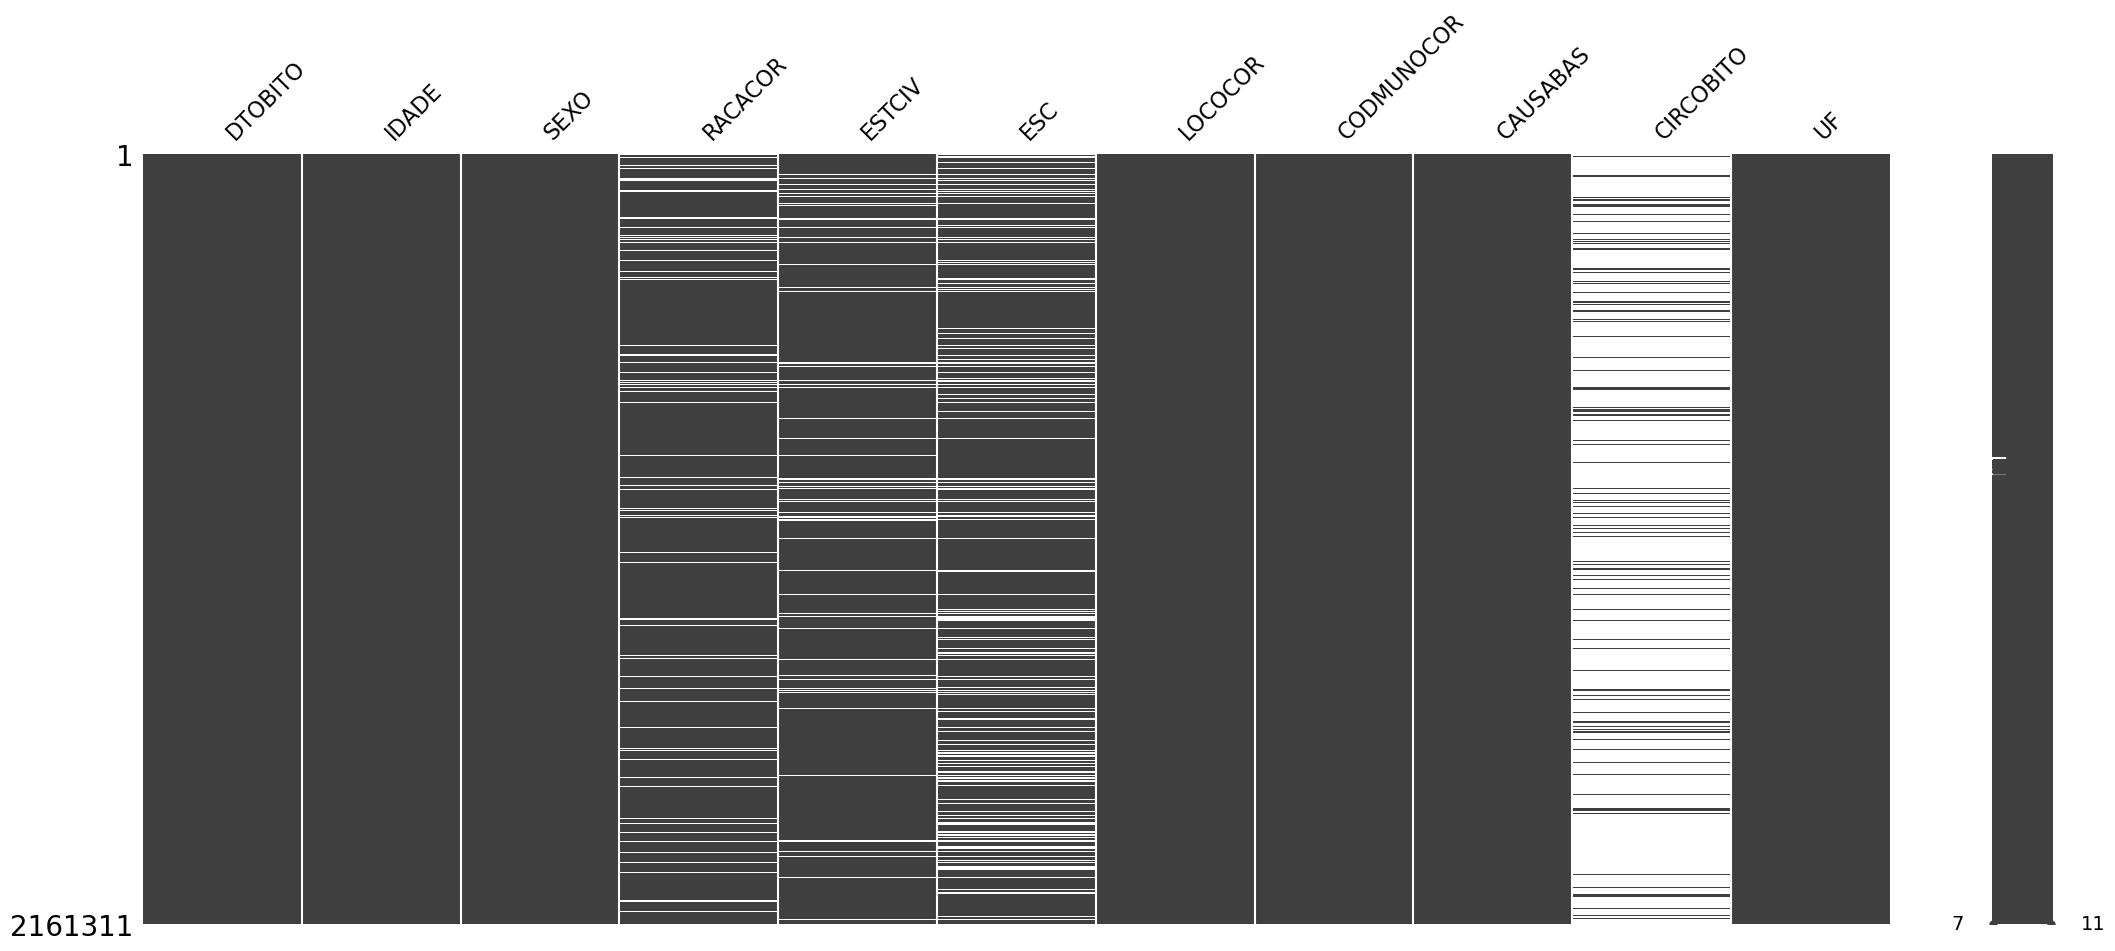

In [ ]:
msno.matrix(df)

In [ ]:
df.to_csv('North_allcauses.csv', index= False)

In [ ]:
suicide.to_csv('Suicide_north.csv', index=False)
accident.to_csv('Accident_north.csv', index=False)
homicide.to_csv('Homicides_north.csv', index=False)

## Processing

In [7]:
df = pd.read_csv('Suicide_north.csv')
df

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,CODMUNOCOR,CAUSABAS,CIRCOBITO,UF
0,16022009,419,1,4.0,1.0,3.0,5,120020,X702,2,AC
1,18022009,449,1,4.0,1.0,2.0,5,120020,X702,2,AC
2,25052009,422,1,4.0,1.0,3.0,3,120020,X729,2,AC
3,21062009,424,1,4.0,1.0,3.0,1,120020,X749,2,AC
4,3102009,419,1,4.0,1.0,3.0,3,120020,X702,2,AC
...,...,...,...,...,...,...,...,...,...,...,...
12809,23122023,436,2,2.0,1.0,4.0,3,172020,X700,2,TO
12810,24122023,435,1,1.0,9.0,9.0,5,290320,X707,2,TO
12811,25122023,454,1,1.0,2.0,4.0,1,171820,X697,2,TO
12812,26122023,442,1,4.0,2.0,4.0,5,172100,X700,2,TO


The age is coded, according to the first digit - 1 = hours of life; 2 = days of life; 3 = months of life; 4/5 = years of life; 999 = age ignored.
During decoding we also excluded children younger than 10 years old.

The date was separated into day, month, year. We then difined the season, based on day and month of death.

In [8]:
def idade(x):
    x['IDADE'] = x['IDADE'] - 400
    if x['IDADE'] < 10 or x['IDADE'] > 150:
        return np.nan
    else:
        return x['IDADE']

df['IDADE'] = df.apply(lambda x: idade(x), axis= 1)

In [9]:
df['DTOBITO'] = df['DTOBITO'].apply(pd.to_datetime, format= "%d%m%Y", errors= 'coerce')

df['MONTH'] = df['DTOBITO'].dt.month
df['DAY'] = df['DTOBITO'].dt.day
df['YEAR'] = df['DTOBITO'].dt.year
df['WEEK_DAY'] = df['DTOBITO'].dt.day_name()

In [10]:
def season(row):
    if row['MONTH'] in [1, 2]:
        return 'summer'
    elif (row['MONTH'] == 12 and row['DAY'] > 21) or (row['MONTH'] == 3 and row['DAY'] <= 21):
        return 'summer'

    elif row['MONTH'] in [4, 5]:
        return 'autumn'
    elif (row['MONTH'] == 3 and row['DAY'] > 21) or (row['MONTH'] == 6 and row['DAY'] <= 21):
        return 'autumn'

    if row['MONTH'] in [7, 8]:
        return 'winter'
    elif (row['MONTH'] == 6 and row['DAY'] > 21) or (row['MONTH'] == 9 and row['DAY'] <= 21):
        return 'winter'

    elif row['MONTH'] in [10, 11]:
        return 'spring'
    elif (row['MONTH'] == 9 and row['DAY'] > 21) or (row['MONTH'] == 12 and row['DAY'] <= 21):
        return 'spring'
    else:
        return 'IGN'

df['SEASON'] = df.apply(lambda row: season(row), axis= 1)

def weekend(row):
    if row['WEEK_DAY'] == 'Saturday' or row['WEEK_DAY'] == 'Sunday':
        return 1
    else:
        return 0

df['WEEKEND'] = df.apply(lambda row: weekend(row), axis= 1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DTOBITO     12755 non-null  datetime64[ns]
 1   IDADE       12764 non-null  float64       
 2   SEXO        12814 non-null  int64         
 3   RACACOR     12620 non-null  float64       
 4   ESTCIV      12522 non-null  float64       
 5   ESC         12354 non-null  float64       
 6   LOCOCOR     12814 non-null  int64         
 7   CODMUNOCOR  12814 non-null  int64         
 8   CAUSABAS    12814 non-null  object        
 9   CIRCOBITO   12814 non-null  int64         
 10  UF          12814 non-null  object        
 11  MONTH       12755 non-null  float64       
 12  DAY         12755 non-null  float64       
 13  YEAR        12755 non-null  float64       
 14  WEEK_DAY    12755 non-null  object        
 15  SEASON      12814 non-null  object        
 16  WEEKEND     12814 non-

In [12]:
df.describe()

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,CODMUNOCOR,CIRCOBITO,MONTH,DAY,YEAR,WEEKEND
count,12755,12764.000000,12814.000000,12620.000000,12522.000000,12354.000000,12814.000000,12814.000000,12814.0,12755.000000,12755.000000,12755.000000,12814.000000
mean,2017-10-01 17:45:44.805958400,34.289486,1.216248,3.549287,2.005271,3.698559,3.165600,142394.691041,2.0,6.409486,17.219051,2017.257311,0.330498
min,2009-01-05 00:00:00,10.000000,0.000000,1.000000,1.000000,0.000000,1.000000,110001.000000,2.0,1.000000,1.000000,2009.000000,0.000000
25%,2014-04-28 12:00:00,22.000000,1.000000,4.000000,1.000000,3.000000,3.000000,130260.000000,2.0,3.000000,10.000000,2014.000000,0.000000
50%,2018-05-18 00:00:00,30.000000,1.000000,4.000000,1.000000,3.000000,3.000000,150040.000000,2.0,6.000000,17.000000,2018.000000,0.000000
75%,2021-06-18 00:00:00,43.000000,1.000000,4.000000,2.000000,4.000000,3.000000,150620.000000,2.0,9.000000,24.000000,2021.000000,1.000000
max,2023-12-31 00:00:00,103.000000,2.000000,5.000000,9.000000,9.000000,9.000000,530010.000000,2.0,12.000000,31.000000,2023.000000,1.000000
std,NaN,16.163234,0.412648,1.163078,1.948085,1.905639,1.088548,29488.389582,0.0,3.459348,8.046098,4.241767,0.470411


We excluded entries with age of date missing, since we could not input these values and they are going to be use directly. Age was ranged in 10-years.

The missing data for race, marital status, and schooling were set as ignored, since it was already an option in the form.

In [13]:
df = df.dropna(subset= ['IDADE', 'MONTH'])

cols = ['RACACOR', 'ESTCIV', 'ESC']
df[cols] = df[cols].replace((np.nan, 9), 0)

column = ['IDADE', 'RACACOR', 'ESTCIV', 'ESC', 'LOCOCOR', 'MONTH', 'DAY', 'YEAR']
df[column] = df[column].astype('Int32')

df = df[df['SEXO'] != 0]

df['Idade'] = pd.cut(df['IDADE'], labels=False, bins=[9, 19, 29, 39, 49, 59, 69, 150])
df

<ipython-input-13-ce1a353763e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].replace((np.nan, 9), 0)
<ipython-input-13-ce1a353763e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype('Int32')


,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,CODMUNOCOR,CAUSABAS,CIRCOBITO,UF,MONTH,DAY,YEAR,WEEK_DAY,SEASON,WEEKEND,Idade
0,2009-02-16,19,1,4,1,3,5,120020,X702,2,AC,2,16,2009,Monday,summer,0,0
1,2009-02-18,49,1,4,1,2,5,120020,X702,2,AC,2,18,2009,Wednesday,summer,0,3
2,2009-05-25,22,1,4,1,3,3,120020,X729,2,AC,5,25,2009,Monday,autumn,0,1
3,2009-06-21,24,1,4,1,3,1,120020,X749,2,AC,6,21,2009,Sunday,autumn,1,1
4,2009-10-03,19,1,4,1,3,3,120020,X702,2,AC,10,3,2009,Saturday,spring,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,2023-12-23,36,2,2,1,4,3,172020,X700,2,TO,12,23,2023,Saturday,summer,1,2
12810,2023-12-24,35,1,1,0,0,5,290320,X707,2,TO,12,24,2023,Sunday,summer,1,2
12811,2023-12-25,54,1,1,2,4,1,171820,X697,2,TO,12,25,2023,Monday,summer,0,4
12812,2023-12-26,42,1,4,2,4,5,172100,X700,2,TO,12,26,2023,Tuesday,summer,0,3


In [14]:
df.to_csv('Suicide_north_clean.csv', index= False)

## Exploring data analysis

In [15]:
df = pd.read_csv('Suicide_north_clean.csv')
df

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,CODMUNOCOR,CAUSABAS,CIRCOBITO,UF,MONTH,DAY,YEAR,WEEK_DAY,SEASON,WEEKEND,Idade
0,2009-02-16,19,1,4,1,3,5,120020,X702,2,AC,2,16,2009,Monday,summer,0,0
1,2009-02-18,49,1,4,1,2,5,120020,X702,2,AC,2,18,2009,Wednesday,summer,0,3
2,2009-05-25,22,1,4,1,3,3,120020,X729,2,AC,5,25,2009,Monday,autumn,0,1
3,2009-06-21,24,1,4,1,3,1,120020,X749,2,AC,6,21,2009,Sunday,autumn,1,1
4,2009-10-03,19,1,4,1,3,3,120020,X702,2,AC,10,3,2009,Saturday,spring,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12699,2023-12-23,36,2,2,1,4,3,172020,X700,2,TO,12,23,2023,Saturday,summer,1,2
12700,2023-12-24,35,1,1,0,0,5,290320,X707,2,TO,12,24,2023,Sunday,summer,1,2
12701,2023-12-25,54,1,1,2,4,1,171820,X697,2,TO,12,25,2023,Monday,summer,0,4
12702,2023-12-26,42,1,4,2,4,5,172100,X700,2,TO,12,26,2023,Tuesday,summer,0,3


In [87]:
df['REGION'] = 'North'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12706 entries, 0 to 12705
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DTOBITO     12706 non-null  object
 1   IDADE       12706 non-null  int64 
 2   SEXO        12706 non-null  int64 
 3   RACACOR     12706 non-null  int64 
 4   ESTCIV      12706 non-null  int64 
 5   ESC         12706 non-null  int64 
 6   LOCOCOR     12706 non-null  int64 
 7   CODMUNOCOR  12706 non-null  int64 
 8   CAUSABAS    12706 non-null  object
 9   CIRCOBITO   12706 non-null  int64 
 10  UF          12706 non-null  object
 11  MONTH       12706 non-null  int64 
 12  DAY         12706 non-null  int64 
 13  YEAR        12706 non-null  int64 
 14  WEEK_DAY    12706 non-null  object
 15  SEASON      12706 non-null  object
 16  WEEKEND     12706 non-null  int64 
 17  Idade       12706 non-null  int64 
 18  REGION      12706 non-null  object
dtypes: int64(13), object(6)
memory usage: 1.8+ MB


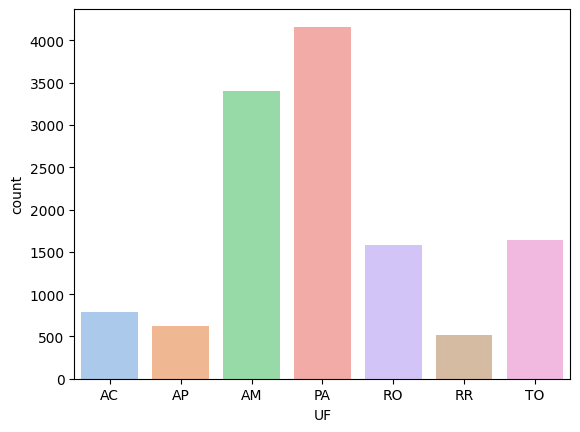

In [10]:
sns.countplot(data= df, x= 'UF', order=['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'], hue= 'UF', palette='pastel', legend=False);

### Population

We calculate the suicide rate per 100.000 population, per year, to get the accumulated rate and the growth of rate for the region.

We also calculated the estimated rate for each state, however the estimates as besed on the population on the last year.

In [11]:
# Load population data
population_data = pd.read_csv('population.csv', delimiter=';')
# Group data by region and year, and calculate suicide rates
def calculate_rate(group):
    year = group['YEAR'].iloc[0]
    region = group['REGION'].iloc[0]

    # Get population for the specific region and year from population_data
    population = population_data.loc[population_data['YEAR'] == year, region].values[0]

    rate = len(group) / population * 100000
    return pd.Series({'RATE': rate})

rates = df.groupby(['REGION', 'YEAR']).apply(calculate_rate).reset_index()

<ipython-input-11-3f232b374fa4>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rates = df.groupby(['REGION', 'YEAR']).apply(calculate_rate).reset_index()


In [12]:
ac = len(df[df['UF'] == 'AC'])
ap = len(df[df['UF'] == 'AP'])
am = len(df[df['UF'] == 'AM'])
pa = len(df[df['UF'] == 'PA'])
ro = len(df[df['UF'] == 'RO'])
rr = len(df[df['UF'] == 'RR'])
to = len(df[df['UF'] == 'TO'])

# estimated population
AC = 830018
AP = 733759
AM = 3941613
PA = 8121025
RO = 1581196
RR = 636707
TO = 1511460

# corrected by the years
years_ac = ac/15
years_ap = ap/15
years_am = am/15
years_pa = pa/15
years_ro = ro/15
years_rr = rr/15
years_to = to/15

# the rate was calculated by 100,000 inhabitants
rate_ac = years_ac/AC*100000
rate_ap = years_ap/AP*100000
rate_am = years_am/AM*100000
rate_pa = years_pa/PA*100000
rate_ro = years_ro/RO*100000
rate_rr = years_rr/RR*100000
rate_to = years_to/TO*100000

In [13]:
dict = {'UF':['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'], 'Rate':[rate_ac, rate_ap, rate_am, rate_pa, rate_ro, rate_rr, rate_to]}
uf = pd.DataFrame(dict)
uf

,UF,Rate
0,AC,6.345244
1,AP,5.651265
2,AM,5.757372
3,PA,3.416646
4,RO,6.665840
5,RR,5.360917
6,TO,7.211570


In [14]:
rates

,REGION,YEAR,RATE
0,North,2009,3.269369
1,North,2010,3.342334
2,North,2011,3.632468
3,North,2012,3.597795
4,North,2013,4.000779
5,North,2014,3.723597
6,North,2015,4.633854
7,North,2016,4.301525
8,North,2017,4.690515
9,North,2018,5.131377


In [21]:
print(f'Accumulated rate in the {rates.groupby("REGION")["RATE"].mean()}')

Accumulated rate in the REGION
North    4.744762
Name: RATE, dtype: float64


In [27]:
df1 = rates[rates['YEAR'] == 2009]
df2 = rates[rates['YEAR'] == 2023]
NO1 = df1[df1['REGION'] == 'North']['RATE'].values[0]
NO2 = df2[df2['REGION'] == 'North']['RATE'].values[0]
cres_NO = ((NO2 - NO1)/NO1)*100
print(f'Growth in rate for the region: {cres_NO:.2f}%')

Growth in rate for the region: 123.47%


In [25]:
df['ANO'] = df['YEAR'] - 2000

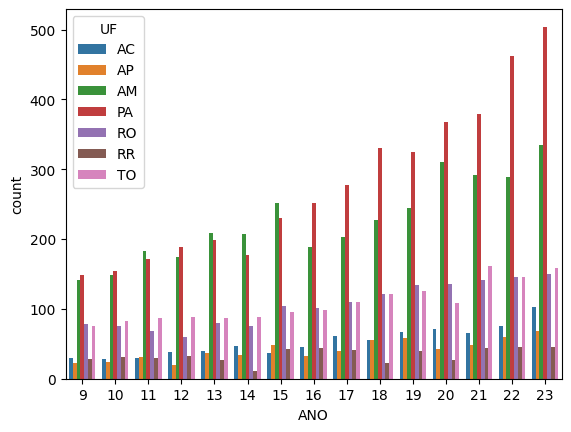

In [34]:
sns.countplot(data= df, x= 'ANO', hue= 'UF');

In [29]:
df1 = df[df['YEAR'] == 2009]
df2 = df[df['YEAR'] == 2023]

AC1 = len(df1[df1['UF'] == 'AC'])
AC2 = len(df2[df2['UF'] == 'AC'])
AP1 = len(df1[df1['UF'] == 'AP'])
AP2 = len(df2[df2['UF'] == 'AP'])
AM1 = len(df1[df1['UF'] == 'AM'])
AM2 = len(df2[df2['UF'] == 'AM'])
PA1 = len(df1[df1['UF'] == 'PA'])
PA2 = len(df2[df2['UF'] == 'PA'])
RO1 = len(df1[df1['UF'] == 'RO'])
RO2 = len(df2[df2['UF'] == 'RO'])
RR1 = len(df1[df1['UF'] == 'RR'])
RR2 = len(df2[df2['UF'] == 'RR'])
TO1 = len(df1[df1['UF'] == 'TO'])
TO2 = len(df2[df2['UF'] == 'TO'])

In [30]:
cres_AC = ((AC2 - AC1)/AC1)*100
cres_AP = ((AP2 - AP1)/AP1)*100
cres_AM = ((AM2 - AM1)/AM1)*100
cres_PA = ((PA2 - PA1)/PA1)*100
cres_RO = ((RO2 - RO1)/RO1)*100
cres_RR = ((RR2 - RR1)/RR1)*100
cres_TO = ((TO2 - TO1)/TO1)*100
print(f'Growth in rate for each state:\nAC - {cres_AC:.2f}\nAP - {cres_AP:.2f}\nAM - {cres_AM:.2f}\nPA - {cres_PA:.2f}\nRO - {cres_RO:.2f}\nRR - {cres_RR:.2f}\nTO - {cres_TO:.2f}')

Growth in rate for each state:
AC - 251.72
AP - 209.09
AM - 137.59
PA - 240.54
RO - 92.31
RR - 64.29
TO - 109.21


### Race

We computed the race/color for the region to normalize by the population by year and show it by 100,000 inhabitants of each race.

In [35]:
race = pd.read_csv('race.csv', delimiter= ';')
race['North']

,North
0,2490
1,3598298
2,1530418
3,29467
4,11654390
5,539821


In [40]:
white = len(df[df['RACACOR'] == 1]) / 3598298	 * 100000 / 15
black = len(df[df['RACACOR'] == 2]) / 1530418 * 100000 / 15
asian = len(df[df['RACACOR'] == 3]) / 29467 * 100000 / 15
brown = len(df[df['RACACOR'] == 4]) / 11654390 * 100000 / 15
native = len(df[df['RACACOR'] == 5]) / 539821 * 100000 / 15

print(f'Rate for each race/color in the North region by 100,000 inhabitants:\nWhite: {white:.2f}\nBlack: {black:.2f}\nAsian: {asian:.2f}\nBrown: {brown:.2f}\nNative: {native:.2f}')

Rate for each race/color in the North region by 100,000 inhabitants:
White: 3.32
Black: 2.57
Asian: 8.37
Brown: 5.23
Native: 11.76


### Cause of Death

We divided the causes of death into Intoxication, Asphixia, Firearm, and Other, based on ther code in the ICD-10.

In [64]:
df['CAUSABAS'] = df['CAUSABAS'][df['CAUSABAS'].str.startswith('X') == True]
df['CAUSABAS'] = df['CAUSABAS'].str.strip()
df['CAUSABAS'] = df['CAUSABAS'].str[:3] #getting the broader category, with only X00, instead of X000
df = df.dropna()

In [65]:
causas = {'X60': 'Intoxication', 'X61': 'Intoxication', 'X62': 'Intoxication',
          'X63': 'Intoxication', 'X64': 'Intoxication', 'X65': 'Intoxication',
          'X66': 'Intoxication', 'X67': 'Intoxication', 'X68': 'Intoxication',
          'X69': 'Intoxication', 'X70': 'Asphyxia', 'X71': 'Asphyxia',
          'X72': 'Firearm', 'X73': 'Firearm', 'X74': 'Firearm', 'X75': 'Firearm',
          'X76': 'Other', 'X77': 'Other', 'X78': 'Other', 'X79': 'Other',
          'X80': 'Other', 'X81': 'Other', 'X82': 'Other', 'X83': 'Other', 'X84': 'Other'}

df['CAUSABAS'] = df['CAUSABAS'].map(causas)

<ipython-input-65-620bc507ab00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CAUSABAS'] = df['CAUSABAS'].map(causas)


In [66]:
asphyxia = (len(df[df['CAUSABAS'] == 'Asphyxia']) / len(df) * 100)
intoxication = len(df[df['CAUSABAS'] == 'Intoxication']) / len(df) * 100
firearm = len(df[df['CAUSABAS'] == 'Firearm']) / len(df) * 100
other = len(df[df['CAUSABAS'] == 'Other']) / len(df) * 100

print(f'Causes of deaths by suicide:\nAsphyxia: {asphyxia:.2f}%\nIntoxication: {intoxication:.2f}%\nFirearm: {firearm:.2f}%\nOther: {other:.2f}%')

Causes of deaths by suicide:
Asphyxia: 82.36%
Intoxication: 6.87%
Firearm: 7.05%
Other: 3.69%


### Sex and age and marital status

We computed the sex and age and marital status for the region to normalize by the population by year and show it by 100,000 inhabitants.

0 - 10-19  
1 - 20-29  
2 - 30-39  
3 - 40-49   
4 - 50-59  
5 - 60-69  
6 - 70+

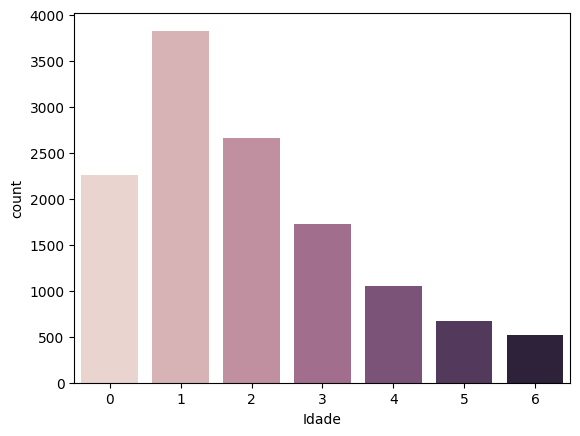

In [68]:
sns.countplot(data= df, x= 'Idade', hue='Idade', legend=False);

In [71]:
age = pd.read_csv('age.csv', delimiter= ';')
age['North']

,North
0,3026001
1,2953823
2,2715405
3,2330687
4,1629467
5,1059995
6,749078


In [75]:
# normalization of cases by age
age_0 = len(df[df['Idade'] == 0]) / 3026001 * 100000 / 15
age_1 = len(df[df['Idade'] == 1]) / 2953823 * 100000 / 15
age_2 = len(df[df['Idade'] == 2]) / 2715405 * 100000 / 15
age_3 = len(df[df['Idade'] == 3]) / 2330687 * 100000 / 15
age_4 = len(df[df['Idade'] == 4]) / 1629467 * 100000 / 15
age_5 = len(df[df['Idade'] == 5]) / 1059995 * 100000 / 15
age_6 = len(df[df['Idade'] == 6]) / 749078 * 100000 / 15

print(f'Rate of age ranges in the North region by 100,000 inhabitants:\n10-19:',
f'{age_0:.2f}\n20-29: {age_1:.2f}\n30-39: {age_2:.2f}\n40-49: {age_3:.2f}\n50-59:',
f'{age_4:.2f}\n60-69: {age_5:.2f}\n70+: {age_6:.2f}')

Rate of age ranges in the North region by 100,000 inhabitants:
10-19: 4.96
20-29: 8.63
30-39: 6.54
40-49: 4.92
50-59: 4.28
60-69: 4.25
70+: 4.57


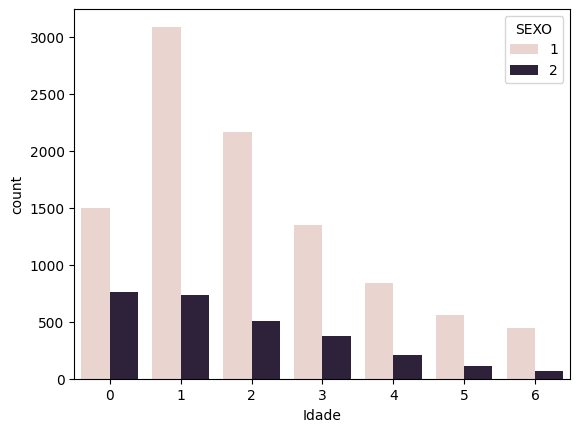

In [88]:
sns.countplot(data= df, x= 'Idade', hue= 'SEXO');

In [90]:
male = len(df[df['SEXO'] == 1]) / len(df) *100
female = len(df[df['SEXO'] == 2]) / len(df) *100
print(f'Ratio Male/Female deaths in the North region: {male/female:.2f}')

Ratio Male/Female in the North region: 3.60


In [91]:
sex = pd.read_csv('sex.csv', delimiter= ';')
sex[['SEXO', 'North']]

,SEXO,North
0,1,8663119
1,2,8691765


In [94]:
# normalization per population
male_normalized = len(df[df['SEXO'] == 1]) / 8663119 *100000 / 15
female_normalized = len(df[df['SEXO'] == 2]) / 8691765 *100000 / 15

print(f'Ratio Male/Female deaths in the North region by 100,000 inhabitants:\nMale: {male_normalized:.2f}\nFemale: {female_normalized:.2f}')

Ratio Male/Female deaths in the North region by 100,000 inhabitants:
Male: 7.65
Female: 2.12


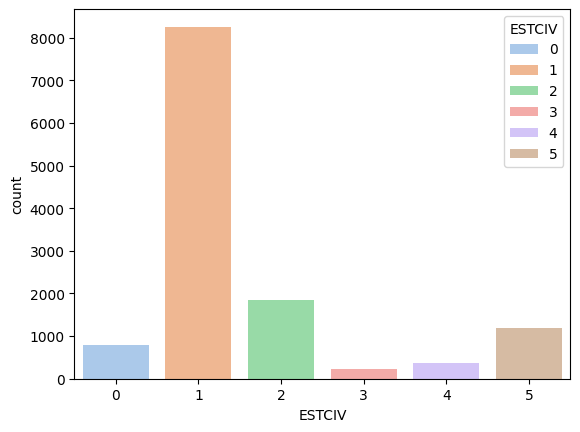

In [16]:
sns.countplot(data= df, x= 'ESTCIV', hue='ESTCIV', palette='pastel');

In [17]:
marital = pd.read_csv('marital.csv', delimiter= ';')
marital[['ESTCIV','North']]

,ESTCIV,North
0,Single,8736471
1,Married/Civil union,3210848
2,Widow,383789
3,Divorced/ Separated,338766


In [18]:
single = len(df[df['ESTCIV'] == 1]) / 8736471 * 100000 / 15
married = (len(df[df['ESTCIV'] == 2])+len(df[df['ESTCIV'] == 5])) / 3210848 * 100000 / 15
widowed = len(df[df['ESTCIV'] == 3]) / 383789 * 100000 / 15
divorced = len(df[df['ESTCIV'] == 4]) / 338766 * 100000 / 15

print(f'Rate of marital status in the North region by 100,000 inhabitants:\nSingle: {single:.2f}\nMarried: {married:.2f}\nWidowed: {widowed:.2f}\nDivorced: {divorced:.2f}')

Rate of marital status in the North region by 100,000 inhabitants:
Single: 6.30
Married: 6.35
Widowed: 3.82
Divorced: 7.32


### Schooling, place of death, and date

Schooling, place of death, and date related variables are presented as the percentage of people who died with the X years of study.  

We opted to not normalize it because statistics on schooling are also in percentage but from people 25 years or older, which would exclude much of our data.


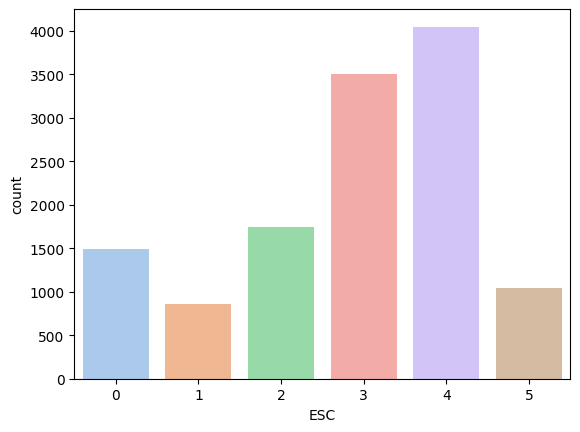

In [20]:
sns.countplot(data= df, x= 'ESC', hue='ESC', legend=False, palette='pastel');

In [26]:
school_0 = len(df[df['ESC'] == 0]) / len(df) * 100
school_1 = len(df[df['ESC'] == 1]) / len(df) * 100
school_2 = len(df[df['ESC'] == 2]) / len(df) * 100
school_3 = len(df[df['ESC'] == 3]) / len(df) * 100
school_4 = len(df[df['ESC'] == 4]) / len(df) * 100
school_5 = len(df[df['ESC'] == 5]) / len(df) * 100

print(f'Schooling in the North region:\nNone: {school_1:.2f}%\n1-3 years: {school_2:.2f}%',
      f'\n4-7 years: {school_3:.2f}%\n8-11 years: {school_4:.2f}%\n12+ years: {school_5:.2f}%\nMissing values: {school_0:.2f}%')

Schooling in the North region:
None: 6.81%
1-3 years: 13.74% 
4-7 years: 27.62%
8-11 years: 31.87%
12+ years: 8.18%
Missing values: 11.78%


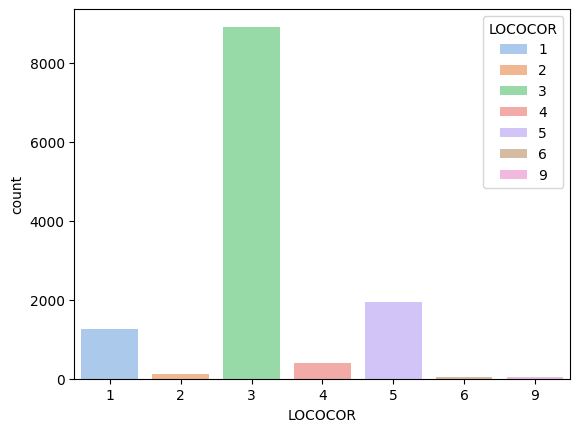

In [27]:
sns.countplot(data= df, x= 'LOCOCOR', hue='LOCOCOR', palette='pastel');

In [29]:
place_1 = len(df[df['LOCOCOR'] == 9]) / len(df) * 100
place_2 = len(df[df['LOCOCOR'] == 1]) / len(df) * 100
place_3 = len(df[df['LOCOCOR'] == 2]) / len(df) * 100
place_4 = len(df[df['LOCOCOR'] == 3]) / len(df) * 100
place_5 = len(df[df['LOCOCOR'] == 4]) / len(df) * 100
place_6 = len(df[df['LOCOCOR'] == 5]) / len(df) * 100

print(f'Place of death in the North region:\nHome: {place_3:.2f}%\nHospital: {place_1:.2f}%\nOther health stablishment: {place_2:.2f}%',
      f'\nPublic road: {place_4:.2f}%\nOther: {place_6:.2f}%\n')

Place of death in the North region:
Home: 0.88%
Hospital: 0.35%
Other health stablishment: 9.82% 
Public road: 70.13%
Other: 15.33%



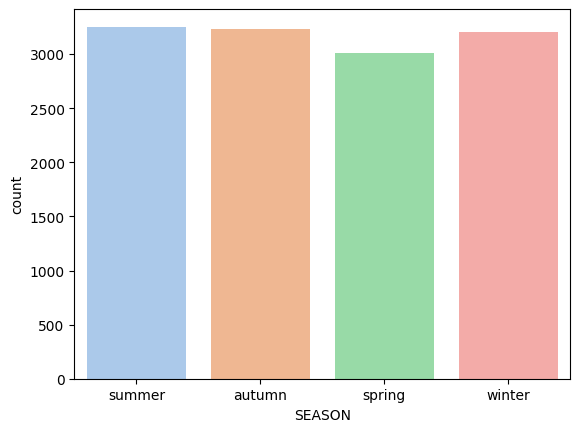

In [23]:
sns.countplot(data= df, x= 'SEASON', hue='SEASON', palette='pastel', legend=False);

In [25]:
summer = len(df[df['SEASON'] == 'summer']) / len(df) * 100
autumn = len(df[df['SEASON'] == 'autumn']) / len(df) * 100
winter = len(df[df['SEASON'] == 'winter']) / len(df) * 100
spring = len(df[df['SEASON'] == 'spring']) / len(df) * 100

print(f'Percentages of deaths in each seasons in the North region:\nSummer: {summer:.2f}%\nAutumn: {autumn:.2f}%\nWinter: {winter:.2f}%\nSpring: {spring:.2f}%')

Percentages of deaths in each seasons in the North region:
Summer: 25.61%
Autumn: 25.43%
Winter: 25.25%
Spring: 23.72%


In [30]:
df

,DTOBITO,IDADE,SEXO,RACACOR,ESTCIV,ESC,LOCOCOR,CODMUNOCOR,CAUSABAS,CIRCOBITO,UF,MONTH,DAY,YEAR,WEEK_DAY,SEASON,WEEKEND,Idade
0,2009-02-16,19,1,4,1,3,5,120020,X702,2,AC,2,16,2009,Monday,summer,0,0
1,2009-02-18,49,1,4,1,2,5,120020,X702,2,AC,2,18,2009,Wednesday,summer,0,3
2,2009-05-25,22,1,4,1,3,3,120020,X729,2,AC,5,25,2009,Monday,autumn,0,1
3,2009-06-21,24,1,4,1,3,1,120020,X749,2,AC,6,21,2009,Sunday,autumn,1,1
4,2009-10-03,19,1,4,1,3,3,120020,X702,2,AC,10,3,2009,Saturday,spring,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12699,2023-12-23,36,2,2,1,4,3,172020,X700,2,TO,12,23,2023,Saturday,summer,1,2
12700,2023-12-24,35,1,1,0,0,5,290320,X707,2,TO,12,24,2023,Sunday,summer,1,2
12701,2023-12-25,54,1,1,2,4,1,171820,X697,2,TO,12,25,2023,Monday,summer,0,4
12702,2023-12-26,42,1,4,2,4,5,172100,X700,2,TO,12,26,2023,Tuesday,summer,0,3


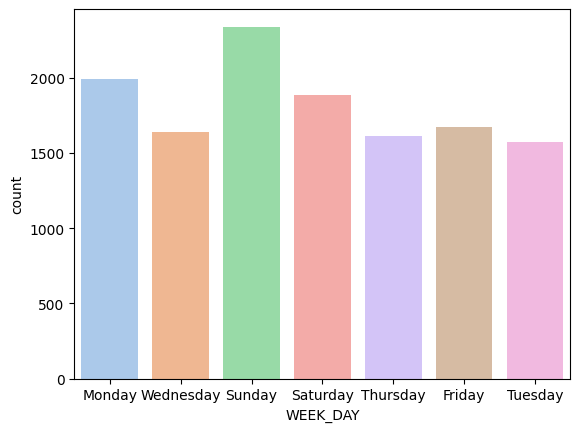

In [33]:
sns.countplot(data= df, x= 'WEEK_DAY', hue='WEEK_DAY', palette='pastel');

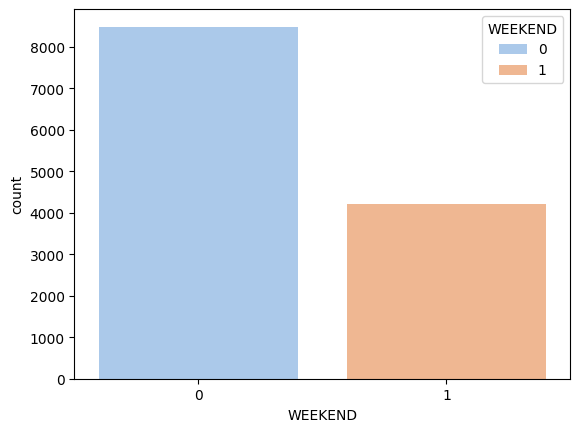

In [34]:
sns.countplot(data= df, x= 'WEEKEND', hue='WEEKEND', palette='pastel');